## Observations and Insights 

1st -- The Ramicane durg has the final smaller tumor value which can mean tha it has worked the best ?

2nd -- that the ramicane and the compulin durg was tested more oftent then the rets fo the drugs 

3rd -- they used one more male rate then female 

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
Combine_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")
Combine_table.head()

# Display the data table for preview
Combine_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
# Checking the number of mice.
Number_of_mice= len(Combine_table["Mouse ID"].unique())
Number_of_mice

249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_by_ID = Combine_table.loc[Combine_table.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice_by_ID

array(['g989'], dtype=object)

In [ ]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_data = Combine_table.drop_duplicates(subset=["Mouse ID", "Timepoint"])
Clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [ ]:
# Checking the number of mice in the clean DataFrame.
Mice_Number = len(Combine_table["Mouse ID"].unique())
Mice_Number

249

## Summary Statistics

In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = Combine_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = Combine_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = Combine_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_deviation = Combine_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
SEM = Combine_table.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary_table_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, 
                          "SEM": SEM})
summary_table_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_table_df_2 = Combine_table.groupby("Drug Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

summary_table_df_2

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

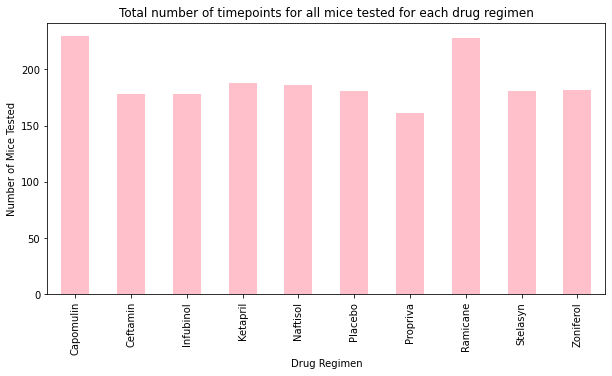

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

Pandas_mice_tested_by_drug = Combine_table.groupby(["Drug Regimen"]).count()["Mouse ID"]

Bar_plot_pandas = Pandas_mice_tested_by_drug.plot (kind="bar", color='PINK', figsize=(10,5))
plt.title("Total number of timepoints for all mice tested for each drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

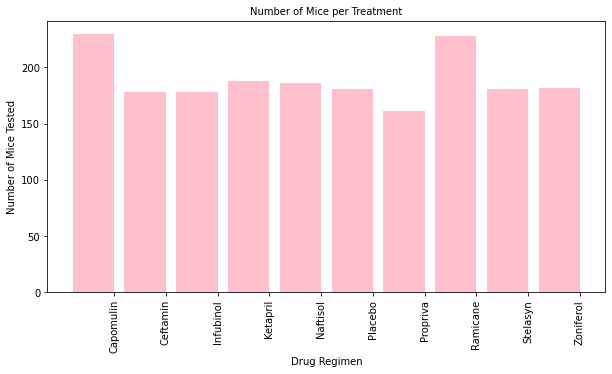

In [ ]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Pyplot_mice_tested_by_drug = (Combine_table.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
Pyplot_mice_tested_by_drug

x_axis = np.arange(len(Pandas_mice_tested_by_drug))
tick_locations = [value+ 0.4 for value in x_axis]
fig1, ax1 = plt.subplots(figsize=(10,5))
plt.xticks(tick_locations, Pandas_mice_tested_by_drug.index.values, rotation="vertical")

plt.bar(x_axis, Pyplot_mice_tested_by_drug, color='Pink')

plt.title("Number of Mice per Treatment",fontsize = 10)
plt.xlabel("Drug Regimen",fontsize = 10)
plt.ylabel("Number of Mice Tested",fontsize = 10)

Pyplot_mice_tested_by_drug


NameError: name 'Male_vs_Female_data_Pandas' is not defined

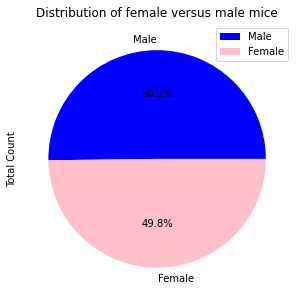

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_rows = Combine_table.loc[:, ["Sex", "Mouse ID"]]
Gender_rows = gender_rows.drop_duplicates()
Gender_count = gender_rows["Sex"].value_counts()

Gender_Values = pd.DataFrame({"Total Count": gender_count})

# Generate a pie plot showing the distribution of female versus male mice
colors = ["blue", "Pink"]
Pandas_Pie_Plot = Gender_Values.plot(kind="pie", figsize=(10,5), colors=colors, y= "Total Count", title = "Distribution of female versus male mice",
                              startangle=0,autopct="%1.1f%%" )

Male_vs_Female_data_Pandas


,Total Count
Male,125
Female,124


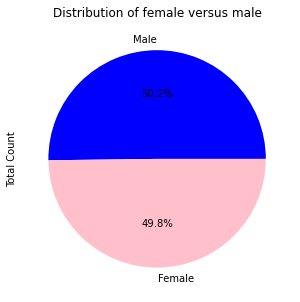

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_rows = Combine_table.loc[:, ["Sex", "Mouse ID"]]
gender_rows = gender_rows.drop_duplicates()
gender_count = gender_rows["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "pINK"]
fig1, ax1 = plt.subplots(figsize=(10, 5))

plt.title("Distribution of female versus male")
plt.ylabel("Total Count",fontsize = 10)
plt.pie(gender_count, labels=labels, colors=colors, autopct="%1.1f%%")

Gender_Values

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Greatest_timepoint = Combine_table.groupby(["Mouse ID"])["Timepoint"].max()
Greatest_timepoint = Greatest_timepoint.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Combined_group_GT = Greatest_timepoint.merge(Combine_table, on=["Mouse ID", "Timepoint"], how="left")
Combined_group_GT

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ceftamin", "Ketapril", "Ramicane", "Infubinol", "Naftisol", "Placebo", "Propriva", "Stelasyn", "Zoniferol"]


# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = Combined_group_GT.loc[Combined_group_GT["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_volume_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.30, .60, .90])
    low_q = quartiles[.30]
    high_q = quartiles[.90]
    i_qr = high_q - low_q 
    
    low_bound = low_q - (1.5*iqr)
    high_bound = high_q + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    print(f"For {drug}, the outliers are: {outliers}")


For Capomulin, the outliers are: 175    23.343598
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ketapril, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane, the outliers are: 97    22.050126
Name: Tumor Volume (mm3), dtype: float64
For Infubinol, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Naftisol, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Placebo, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Propriva, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Stelasyn, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Zoniferol, the outliers are: Series([], Name: Tumor Volume (mm3), dtype: float64)


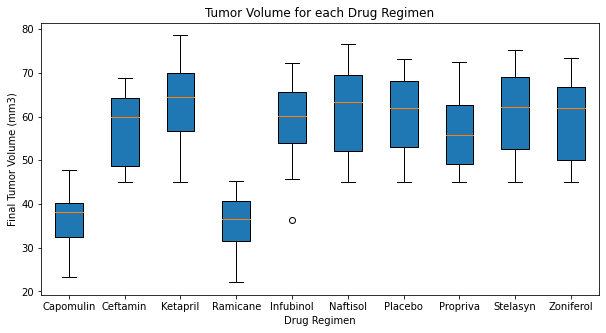

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
figure_1, ax1 = plt.subplots(figsize=(10,5))

ax1.set_title('Tumor Volume for each Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen',)

ax1.boxplot(tumor_volume_data, labels=treatments, patch_artist=True,vert=True)
plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

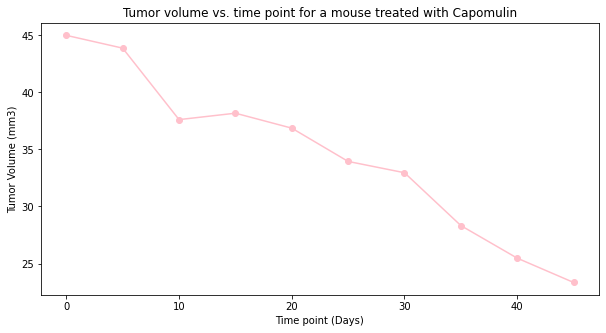

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_data = Combine_table.loc[Combine_table["Drug Regimen"] == "Capomulin",:]
capomulin_data

capomulin_mouse = capomulin_data.loc[capomulin_data["Mouse ID"] == "s185",:]
capomulin_mouse

x_axis = capomulin_mouse["Timepoint"]
tumor_volume = capomulin_mouse["Tumor Volume (mm3)"]

figure_1, ax1 = plt.subplots(figsize=(10, 5))
plt.title("Tumor volume vs. time point for a mouse treated with Capomulin",)
plt.plot(x_axis, tumor_volume, marker="o", color="pink", label="mm3")
plt.xlabel("Time point (Days)")
plt.ylabel("Tumor Volume (mm3)")

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.7
b742,7.0,21.0,22.5,40.083699,0.0
f966,16.0,17.0,10.0,36.505973,0.0
g288,3.0,19.0,22.5,41.990097,0.8
g316,22.0,22.0,22.5,44.613344,1.0


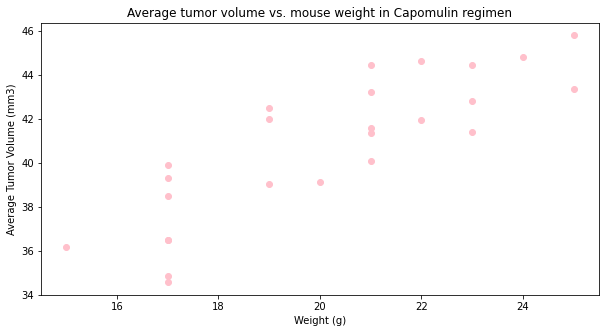

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_capomuline = capomulin_data.groupby(['Mouse ID']).mean()
figure_1, ax1 = plt.subplots(figsize=(10, 5))
marker_size=5

plt.scatter(average_capomuline['Weight (g)'],average_capomuline['Tumor Volume (mm3)'], color="pink")
plt.title("Average tumor volume vs. mouse weight in Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

average_capomuline.head()

## Correlation and Regression

Text(0, 0.5, 'Averag Tumor Volume (mm3)')

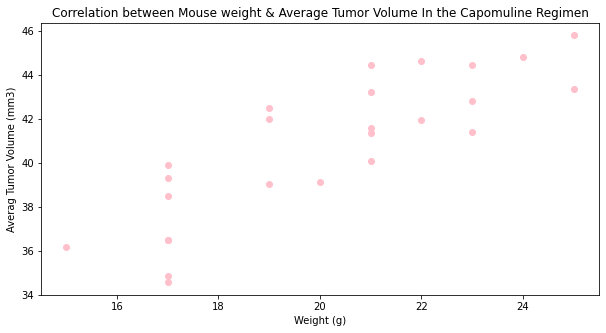

In [ ]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation_Value = round(st.pearsonr(average_capomuline['Weight (g)'],average_capomuline['Tumor Volume (mm3)'])[0],2)
correlation_Value

figure_1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(average_capomuline['Weight (g)'],average_capomuline['Tumor Volume (mm3)'], color="pink")
plt.title("Correlation between Mouse weight & Average Tumor Volume In the Capomuline Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Averag Tumor Volume (mm3)")

y = 0.95x + 21.55


Text(0.2, 0.8, 'y = 0.95x + 21.55')

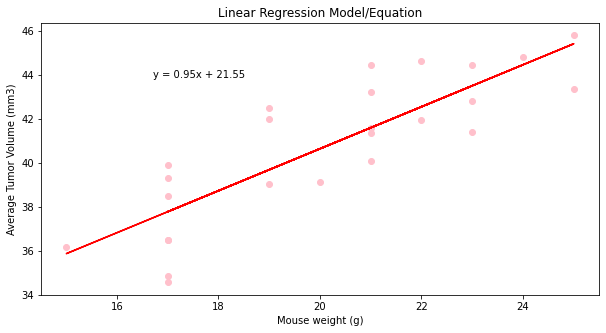

In [ ]:
# Calculate the linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = average_capomuline['Weight (g)']
y_values = average_capomuline['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

figure_1, ax1 = plt.subplots(figsize=(10, 5))
plt.scatter(x_values,y_values, color="Pink")
plt.plot(x_values,regress_values,"r-")
plt.title("Linear Regression Model/Equation")
plt.xlabel("Mouse weight (g)",)
plt.ylabel("Average Tumor Volume (mm3)")

plt.annotate(line_eq, xy=(20,40), xycoords="data",xytext=(0.2, 0.80), textcoords="axes fraction")